In [1]:
using ElasticNetworks, Statistics, LinearAlgebra

## Strain stiffening of a cytoskeletal network

In [2]:
cyto_net = load_network("../data/threshold0x001_conc0.5_maxrl3_epsilon0x05_17500.jld2")
display(cyto_net.g)
display(cyto_net.points)
display(cyto_net.rest_lengths)
display(cyto_net.image_info)
display(cyto_net.youngs)

{1359, 2712} undirected simple Int64 graph

3×1359 Matrix{Float64}:
 0.442969  0.906131  0.756105  0.932601  …  0.115395  0.384392  0.56442
 0.119794  0.124813  0.887844  0.262796     0.301546  0.555719  0.675178
 0.720869  0.497534  0.332571  0.842789     0.229909  0.150017  0.163738

Dict{Graphs.SimpleGraphs.SimpleEdge{Int64}, Float64} with 2712 entries:
  Edge 462 => 961   => 2.28707
  Edge 401 => 1057  => 2.21573
  Edge 1012 => 1153 => 1.12945
  Edge 80 => 493    => 0.626572
  Edge 616 => 1050  => 1.46047
  Edge 697 => 1108  => 0.394111
  Edge 8 => 1066    => 2.08684
  Edge 164 => 247   => 1.64176
  Edge 454 => 694   => 1.9777
  Edge 41 => 673    => 0.913614
  Edge 522 => 841   => 1.68942
  Edge 1075 => 1173 => 1.14962
  Edge 1052 => 1165 => 2.20854
  Edge 13 => 907    => 1.75834
  Edge 1108 => 1148 => 1.78964
  Edge 314 => 1229  => 1.65566
  Edge 19 => 958    => 0.452903
  Edge 70 => 459    => 1.21694
  Edge 121 => 456   => 1.70002
  ⋮                 => ⋮

Dict{Graphs.SimpleGraphs.SimpleEdge{Int64}, Vector{Int64}} with 2712 entries:
  Edge 462 => 961   => [1, 0, 0]
  Edge 401 => 1057  => [0, 0, 0]
  Edge 1012 => 1153 => [0, 0, 0]
  Edge 80 => 493    => [1, 0, 0]
  Edge 616 => 1050  => [0, 0, 0]
  Edge 697 => 1108  => [0, 0, 0]
  Edge 8 => 1066    => [1, 0, 0]
  Edge 164 => 247   => [0, 0, 0]
  Edge 454 => 694   => [0, 0, 0]
  Edge 41 => 673    => [0, 0, 0]
  Edge 522 => 841   => [-1, 0, 0]
  Edge 1075 => 1173 => [-1, 1, 0]
  Edge 1052 => 1165 => [0, 0, -1]
  Edge 13 => 907    => [0, 0, 0]
  Edge 1108 => 1148 => [0, 0, 0]
  Edge 314 => 1229  => [0, 0, 0]
  Edge 19 => 958    => [0, 0, 0]
  Edge 70 => 459    => [0, 0, 0]
  Edge 121 => 456   => [0, 0, 0]
  ⋮                 => ⋮

Dict{Graphs.SimpleGraphs.SimpleEdge{Int64}, Float64} with 2712 entries:
  Edge 462 => 961   => 1.0
  Edge 401 => 1057  => 1.0
  Edge 1012 => 1153 => 1.0
  Edge 80 => 493    => 1.0
  Edge 616 => 1050  => 1.0
  Edge 697 => 1108  => 1.0
  Edge 8 => 1066    => 1.0
  Edge 164 => 247   => 1.0
  Edge 454 => 694   => 1.0
  Edge 41 => 673    => 1.0
  Edge 522 => 841   => 1.0
  Edge 1075 => 1173 => 1.0
  Edge 1052 => 1165 => 1.0
  Edge 13 => 907    => 1.0
  Edge 1108 => 1148 => 1.0
  Edge 314 => 1229  => 1.0
  Edge 19 => 958    => 1.0
  Edge 70 => 459    => 1.0
  Edge 121 => 456   => 1.0
  ⋮                 => ⋮

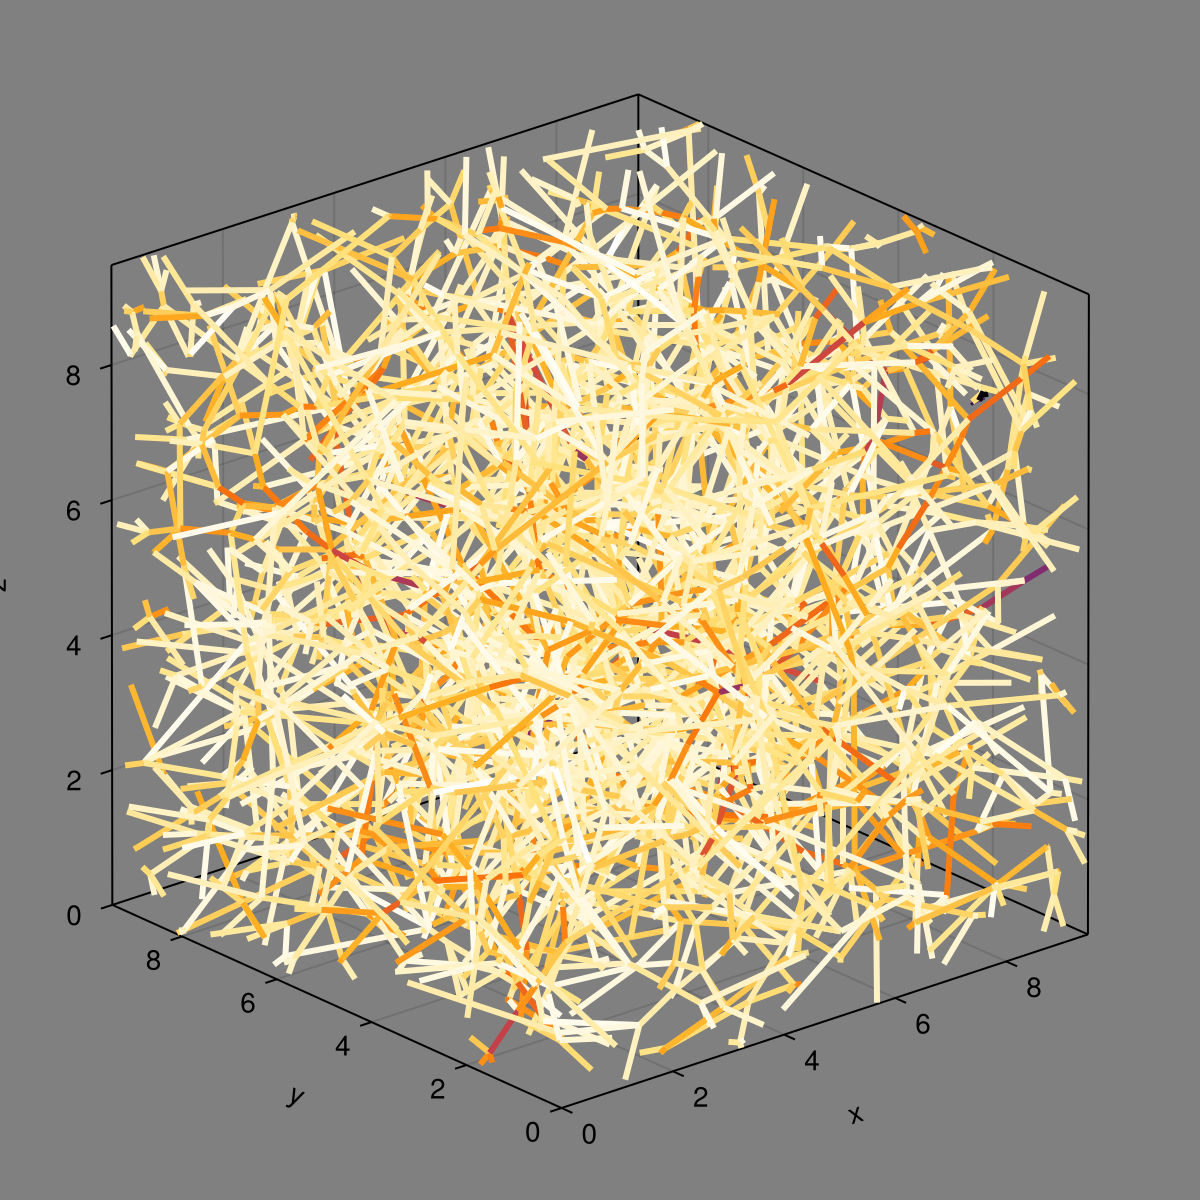

In [3]:
visualize_net(cyto_net)

In [4]:
mean(tensions(cyto_net))

0.008133850101248388

In [5]:
moduli(cyto_net) #this takEs about 40 seconds

B = 0.28269569429851776 
 G = 0.026874514393417252 
 c1111 = 0.3526109201439431 
 c2222 = 0.317510384533873 
 c3333 = 0.2866431813566683 
 c1212 = 0.026659515851404265 
 c1313 = 0.028182678839586056 
 c2323 = 0.025191675706630532 
 c1122 = 0.278453915746671 
 c1133 = 0.2666222905934444 
 c2233 = 0.24867217498597272


(0.28269569429851776, 0.026874514393417252, 0.3526109201439431, 0.317510384533873, 0.2866431813566683, 0.026659515851404265, 0.028182678839586056, 0.025191675706630532, 0.278453915746671, 0.2666222905934444, 0.24867217498597272)

In [18]:
cyto_net_dilated = deepcopy(cyto_net)
cyto_net_dilated.basis[1, 1] *= 1.1 #apply 10% uniaxial strain

10.424263041710232

In [19]:
moduli(cyto_net_dilated)

B = 0.31369520957503727 
 G = 0.0829789160239432 
 c1111 = 0.63956119212454 
 c2222 = 0.336775438515104 
 c3333 = 0.31619903024201723 
 c1212 = 0.08553138563994878 
 c1313 = 0.0901364267278055 
 c2323 = 0.06350175167368691 
 c1122 = 0.28770479874254673 
 c1133 = 0.2827429524425115 
 c2233 = 0.19491286146177889


(0.31369520957503727, 0.0829789160239432, 0.63956119212454, 0.336775438515104, 0.31619903024201723, 0.08553138563994878, 0.0901364267278055, 0.06350175167368691, 0.28770479874254673, 0.2827429524425115, 0.19491286146177889)

In [20]:
visualize_net(cyto_net_dilated) #notice how many edges are now parallel now.

Note that $G$ has increased 3-fold with just a 10% uniaxial strain!

Now we apply a shear strain.

In [21]:
cyto_net_sheared = deepcopy(cyto_net)
cyto_net_sheared.basis *= ([0 0.1 0; 0.1 0 0; 0 0 0] + I)
moduli(cyto_net_sheared) #takes 90 seconds because relaxation takes time.

B = 0.2609951004182405 
 G = 0.05430485674194841 
 c1111 = 0.36099807823842367 
 c2222 = 0.33547040495003105 
 c3333 = 0.26944384854701575 
 c1212 = 0.09030958382193531 
 c1313 = 0.046544244348847685 
 c2323 = 0.043206940298584504 
 c1122 = 0.25713204426569114 
 c1133 = 0.22220545000523922 
 c2233 = 0.21218429174341658


(0.2609951004182405, 0.05430485674194841, 0.36099807823842367, 0.33547040495003105, 0.26944384854701575, 0.09030958382193531, 0.046544244348847685, 0.043206940298584504, 0.25713204426569114, 0.22220545000523922, 0.21218429174341658)

In [ ]:
visualize_net(cyto_net_sheared) #notice again how many edges are now parallel now.

## What about a cubic network that does not have tensional rigidity?

In [23]:
println("cubic network:")
cube_net = cubic_network(10, 10)
moduli(cube_net)
println("dilated cubic:")
cube_net_dilated = deepcopy(cube_net)
cube_net_dilated.basis[1, 1] *= 1.1
moduli(cube_net_dilated)
println("sheared cubic:")
cube_net_sheared = deepcopy(cube_net)
cube_net_sheared.basis *= ([0 0.1 0; 0.1 0 0; 0 0 0] + I)
moduli(cube_net_sheared)

cubic network:
B = 0.3333333333333333 
 G = 0.2 
 c1111 = 1.0 
 c2222 = 1.0 
 c3333 = 1.0 
 c1212 = 0.0 
 c1313 = 0.0 
 c2323 = 0.0 
 c1122 = 0.0 
 c1133 = 0.0 
 c2233 = 0.0
dilated cubic:
B = 0.3242424242424274 
 G = 0.2045454545454551 
 c1111 = 1.1000000000000156 
 c2222 = 0.9090909090909091 
 c3333 = 0.9090909090909091 
 c1212 = 0.024999999999999866 
 c1313 = 0.024999999999999866 
 c2323 = 2.5232341468787135e-18 
 c1122 = 3.1086244689504383e-15 
 c1133 = 3.1086244689504383e-15 
 c2233 = 0.0
sheared cubic:
B = 0.3389190724377206 
 G = 0.20438797050542543 
 c1111 = 1.0002992866236362 
 c2222 = 1.0002997923896 
 c3333 = 1.0100975230594151 
 c1212 = 0.022434269203587907 
 c1313 = 0.0012680892426012278 
 c2323 = 0.0012678017011930481 
 c1122 = 0.01990400594949482 
 c1133 = 5.252659950549798e-6 
 c2233 = -0.00012173367602819063


(0.3389190724377206, 0.20438797050542543, 1.0002992866236362, 1.0002997923896, 1.0100975230594151, 0.022434269203587907, 0.0012680892426012278, 0.0012678017011930481, 0.01990400594949482, 5.252659950549798e-6, -0.00012173367602819063)

In [24]:
visualize_net(cube_net_sheared)

## What about a diamond network with the same prestrain?

In [25]:
println("diamond:")
diamond_net = diamond1000(9.4766, 0.0081)
moduli(diamond_net)
println("dilated diamond:")
diamond_net_dilated = deepcopy(diamond_net)
diamond_net_dilated.basis[1, 1] *= 1.1
moduli(diamond_net_dilated)
println("sheared diamond:")
diamond_net_sheared = deepcopy(diamond_net)
diamond_net_sheared.basis *= ([0 0.1 0; 0.1 0 0; 0 0 0] + I)
moduli(diamond_net_sheared)

diamond:
B = 0.21603127713459339 
 G = 0.005653995850661213 
 c1111 = 0.21950286397080312 
 c2222 = 0.21950286397080312 
 c3333 = 0.2195028639708031 
 c1212 = 0.007687532999663846 
 c1313 = 0.007687532999663829 
 c2323 = 0.0076875329996638365 
 c1122 = 0.21429548371648857 
 c1133 = 0.2142954837164885 
 c2233 = 0.2142954837164886
dilated diamond:
B = 0.2101395150309115 
 G = 0.0273269051784048 
 c1111 = 0.2869518315515147 
 c2222 = 0.20018755069197094 
 c3333 = 0.20018755069197094 
 c1212 = 0.039075331012213554 
 c1313 = 0.0390753310122135 
 c2323 = 0.03002966994623593 
 c1122 = 0.2129756914963029 
 c1133 = 0.2129756914963029 
 c2233 = 0.1760129681787677
sheared diamond:
B = 0.21483221696543206 
 G = 0.018528835400376337 
 c1111 = 0.23412843305383177 
 c2222 = 0.23412843305383163 
 c3333 = 0.20236779648989506 
 c1212 = 0.046294986364496735 
 c1313 = 0.01664259239337689 
 c2323 = 0.016642592393376954 
 c1122 = 0.22235752945462817 
 c1133 = 0.2045375577955172 
 c2233 = 0.20453755779551974

(0.21483221696543206, 0.018528835400376337, 0.23412843305383177, 0.23412843305383163, 0.20236779648989506, 0.046294986364496735, 0.01664259239337689, 0.016642592393376954, 0.22235752945462817, 0.2045375577955172, 0.20453755779551974)

In [26]:
visualize_net(diamond_net_sheared)

## What about a Erdos-Renyi network with random node positions?

In [6]:
ern = er(9.4766, rand(3, 1300), 4.0, 0.3, 3.0)

Network(Graphs.SimpleGraphs.SimpleGraph{Int64}(1668, [[222, 327, 899], [214, 474], [98, 547], [39], [74, 423, 847, 974], [32, 703], [57, 163, 364, 629, 1051, 1289], [219, 650], [357, 960, 1083], Int64[]  …  [376, 534, 992, 1056], [129, 481, 804], Int64[], [258, 805, 1012], [611, 622, 985], [441, 909], [600, 897, 1148, 1226], [99, 432, 615, 875, 987], [40, 164], [460, 977, 1191, 1197]]), [9.4766 0.0 0.0; 0.0 9.4766 0.0; 0.0 0.0 9.4766], [0.5824500758523646 0.2819868139103455 … 0.872568963470491 0.5361698156494574; 0.5392797467216771 0.29580942411876887 … 0.7214192262710731 0.6388848535323285; 0.7847567772695809 0.9244349331244858 … 0.08110959146985852 0.7916704378969592], Dict{Graphs.SimpleGraphs.SimpleEdge{Int64}, Float64}(Edge 13 => 238 => 2.6367586919211186, Edge 643 => 1125 => 2.893978597768991, Edge 91 => 136 => 2.4832638709761534, Edge 1173 => 1202 => 2.538600372907483, Edge 819 => 1106 => 1.8364242729912623, Edge 905 => 1147 => 1.5391751255240853, Edge 170 => 1253 => 1.9053701401

In [7]:
relax!(ern; show_trace = true)

Iter     Function value   Gradient norm 
     0     3.431362e+02     2.033629e+01
 * time: 0.024000167846679688
     1     6.341654e+01     8.691166e+00
 * time: 1.0980000495910645
     2     6.318931e+01     8.689004e+00
 * time: 1.9279999732971191
     3     6.294762e+01     8.679303e+00
 * time: 2.26200008392334
     4     6.279774e+01     8.679128e+00
 * time: 2.742000102996826
     5     6.247198e+01     8.662536e+00
 * time: 3.0859999656677246
     6     6.227373e+01     8.658554e+00
 * time: 3.4790000915527344
     7     6.185720e+01     8.657669e+00
 * time: 3.8359999656677246
     8     6.182490e+01     8.657244e+00
 * time: 4.21399998664856
     9     6.174783e+01     8.656338e+00
 * time: 4.559000015258789
    10     6.130946e+01     8.631686e+00
 * time: 4.894999980926514
    11     6.120310e+01     8.629005e+00
 * time: 5.251000165939331
    12     6.088284e+01     8.606621e+00
 * time: 5.565000057220459
    13     6.057333e+01     8.604572e+00
 * time: 5.9070000648498535


3×1300 Matrix{Float64}:
 0.602463  0.345241  0.183274  0.829238  …  1.1126     0.713768   0.536118
 0.319408  0.131105  0.205306  0.706218     0.777406   0.721619   0.638881
 0.638165  0.633785  0.551989  0.142012     0.291014  -0.0101312  0.791975

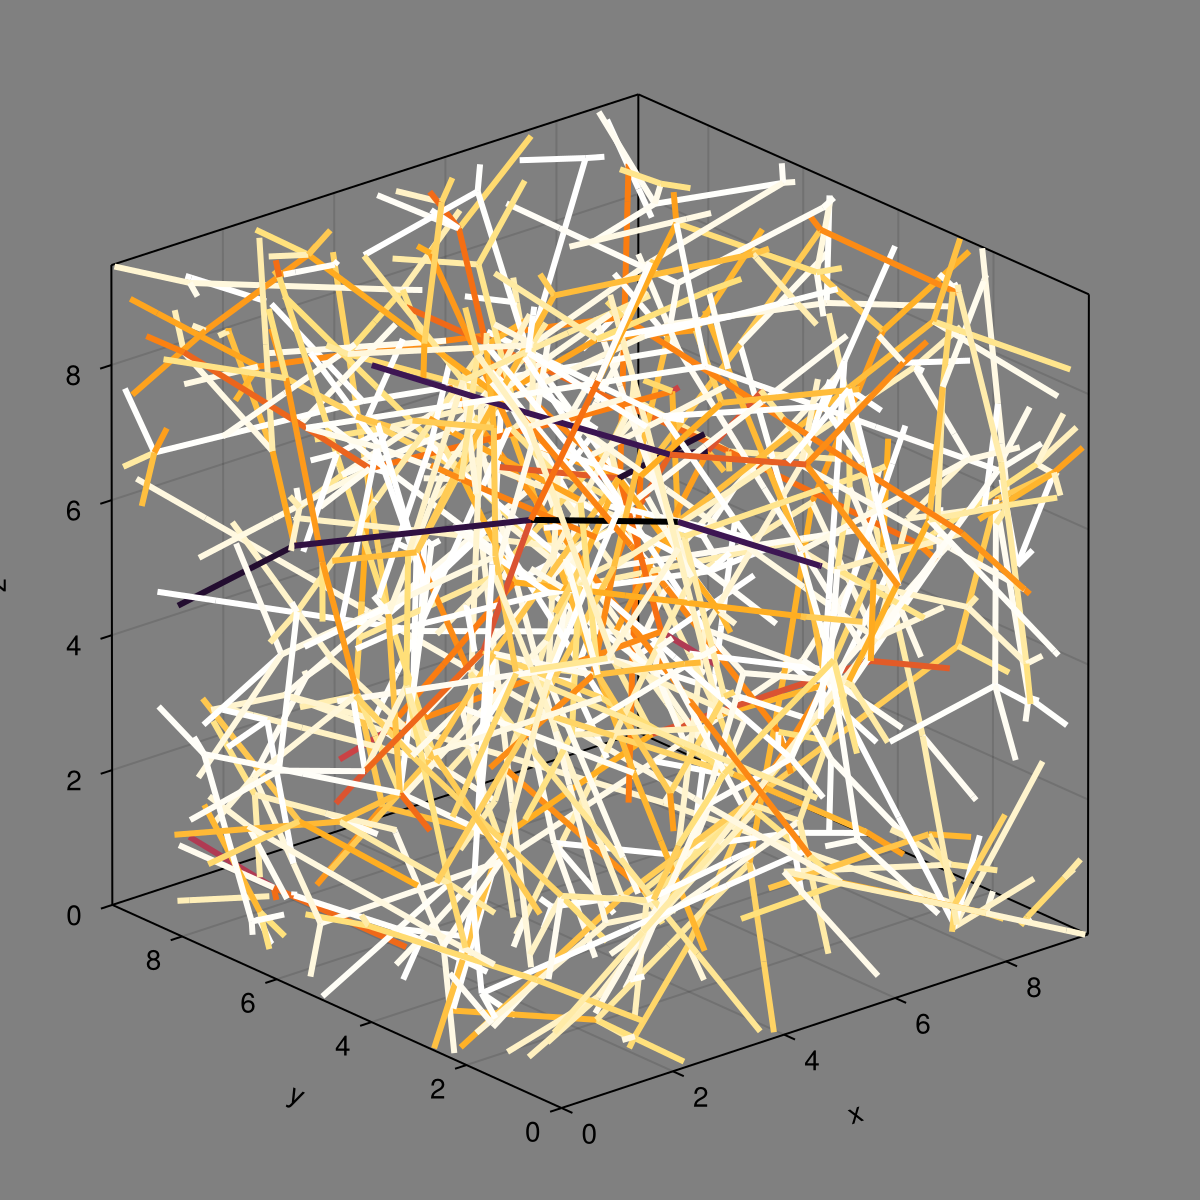

In [6]:
#create a copy of the network 
erncopy = deepcopy(ern)
#remove contributions to soft modes such as degree-0, degree-1 nodes, and degree-2 nodes joining 2 edges bent at an angle.
simplify_net!(erncopy) 
visualize_net(erncopy)

In [7]:
moduli(erncopy)

B = 0.09443848505191951 
 G = 0.02045372945546869 
 c1111 = 0.10500113744853119 
 c2222 = 0.10979344127417064 
 c3333 = 0.15199072194981317 
 c1212 = 0.01656214801529738 
 c1313 = 0.025368005975255997 
 c2323 = 0.018603570528411866 
 c1122 = 0.06981661853944492 
 c1133 = 0.08923758303998516 
 c2233 = 0.08252633081795022


(0.09443848505191951, 0.02045372945546869, 0.10500113744853119, 0.10979344127417064, 0.15199072194981317, 0.01656214801529738, 0.025368005975255997, 0.018603570528411866, 0.06981661853944492, 0.08923758303998516, 0.08252633081795022)